# Initial Setup

In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Import Processed data as Samples

In [4]:
samples = pd.read_csv("data/processed/samples.csv", encoding="latin-1")

In [5]:
samples = samples.drop("Unnamed: 0", axis=1)
samples.head()

,geo_id,year,establishments,employees,growth,exemptions_stay,exemptions_in_is,exemptions_in_oos,exemptions_out_is,exemptions_out_oos,returns_stay,returns_in_is,returns_in_oos,returns_out_is,returns_out_oos,agi_stay,agi_in_is,agi_in_oos,agi_out_is,agi_out_oos
0,1001,2005,35,157,False,35901.0,2185.0,4184.0,1883.0,3338.0,15062.0,951.0,1410.0,853.0,1245.0,714261.0,32399.0,73510.0,26576.0,59705.0
1,1001,2006,34,175,False,36850.0,2519.0,4209.0,2102.0,3545.0,15473.0,1139.0,1551.0,971.0,1307.0,756692.0,38883.0,82027.0,31657.0,70658.0
2,1001,2007,30,109,True,37767.0,2394.0,4168.0,2127.0,3443.0,15944.0,1072.0,1447.0,1025.0,1284.0,827611.0,37153.0,79737.0,36112.0,67092.0
3,1001,2008,38,116,False,39518.0,2548.0,3863.0,2047.0,3601.0,16791.0,1185.0,1458.0,989.0,1398.0,901200.0,43332.0,83366.0,34063.0,69089.0
4,1001,2009,37,0,False,40719.0,2230.0,3873.0,2118.0,3660.0,17385.0,1038.0,1462.0,1018.0,1375.0,936888.0,36050.0,79697.0,34539.0,75861.0


Split off a hold-out test set of data

In [8]:
y = samples["growth"]
X = samples.drop("growth", axis=1)
X_train_labeled, X_test_labeled, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)

Remove the year and geo_id labels

In [10]:
X_train = X_train_labeled.drop(["geo_id", "year"], axis=1)
X_test = X_test_labeled.drop(["geo_id", "year"], axis=1)

# Models
## Model 1: Logistic Regression

In [11]:
# define steps and hyperparameter ranges
steps_1 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", LogisticRegression())]
parameters_1 = {"pca__n_components":np.arange(16,18),
               "model__C": [0.01, 0.1, 1, 10, 100],
                "model__class_weight": ["balanced"],
               "model__solver": ["liblinear", "newton-cg", "sag", "lbfgs"]}

In [12]:
# create pipeline and train model
pipeline_1 = Pipeline(steps_1)
cv_1 = GridSearchCV(pipeline_1, parameters_1)
cv_1.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [16]:
# train results
y_pred_train_1 = cv_1.predict(X_train)
confusion_matrix(y_train, y_pred_train_1)

array([[12580,  2626],
       [ 5704,  2655]], dtype=int64)

In [17]:
# score the model
y_pred_1 = cv_1.predict(X_test)
print("Best Score:", cv_1.score(X_test, y_test))
print("Best Params:", cv_1.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

Best Score: 0.646976448122
Best Params: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__solver': 'newton-cg', 'pca__n_components': 17}
Classification Report:
             precision    recall  f1-score   support

      False       0.69      0.82      0.75      5044
       True       0.51      0.33      0.40      2811

avg / total       0.62      0.65      0.63      7855



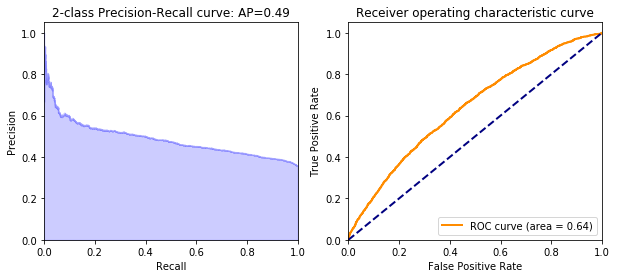

In [18]:
#more statistics to compute for graphing
y_score_1 = cv_1.decision_function(X_test)
precision_1, recall_1, _ = precision_recall_curve(y_test, y_score_1)
average_precision_1 = average_precision_score(y_test, y_score_1)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_score_1, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall_1, precision_1, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_1, precision_1, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_1))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr_1, tpr_1, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr_1, tpr_1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

It can be seen that the model is not learning to predict the true values, the instances in which business growth is positive. Despite parameter tuning and testing with a variety of models, accuracy does not improve far beyond the %60 range.

In [20]:
y_train.head()

25697    False
7945     False
19682    False
16984    False
8360      True
Name: growth, dtype: bool

In [22]:
y_pred_train_1

array([False, False, False, ..., False, False, False], dtype=bool)

In [33]:
X_train_labeled["y_true"] = y_train
X_train_labeled["y_predicted"] = y_pred_train_1
X_train_labeled.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,geo_id,year,establishments,employees,exemptions_stay,exemptions_in_is,exemptions_in_oos,exemptions_out_is,exemptions_out_oos,returns_stay,...,returns_in_oos,returns_out_is,returns_out_oos,agi_stay,agi_in_is,agi_in_oos,agi_out_is,agi_out_oos,y_true,y_predicted
25697,48093,2012,9,0,10019.0,313.0,502.0,342.0,524.0,4296.0,...,244.0,180.0,232.0,159361.0,3618.0,9592.0,5030.0,7937.0,False,False
7945,19011,2010,12,48,21970.0,899.0,355.0,750.0,476.0,9449.0,...,181.0,445.0,238.0,542430.0,18466.0,6457.0,14596.0,10215.0,False,False
19682,37157,2007,61,177,70822.0,1697.0,2629.0,1743.0,2180.0,32101.0,...,1238.0,895.0,1088.0,1398501.0,28969.0,47676.0,28614.0,40174.0,False,False
16984,31089,2009,10,0,8662.0,99.0,348.0,127.0,270.0,3798.0,...,151.0,91.0,146.0,152935.0,2264.0,5580.0,2121.0,5352.0,False,False
8360,19095,2005,4,0,13993.0,423.0,307.0,327.0,330.0,6086.0,...,159.0,195.0,180.0,318045.0,9656.0,6222.0,6030.0,8083.0,True,False


In [39]:
# false positives
fp = X_train_labeled[X_train_labeled["y_true"] == False]
fp = fp[fp["y_predicted"] == True]

# false negatives
fn = X_train_labeled[X_train_labeled["y_true"] == True]
fn = fn[fn["y_predicted"] == False]

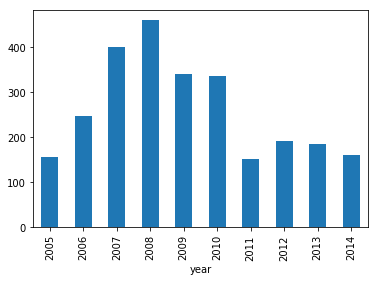

In [48]:
# false positives by year
fp.groupby("year").sum()["y_predicted"].plot(kind="bar")
plt.show()

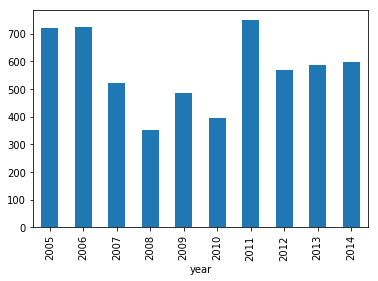

In [49]:
# false negatives by year
fn.groupby("year").sum()["y_true"].plot(kind="bar")
plt.show()

In [51]:
# Let's look by geographic area

import folium
import branca
import json

#series is a pandas series with fips code index and values for map coloring
def county_map(series, map_tiles='cartodbpositron', color="YlOrRd", caption="Legend", steps=6):
    
            
    series_max = series.quantile(.99)
    series_min = series.quantile(.01)
    

    def style_function(feature):
        map_series = series.get(int(feature['id'][-5:]), None)
        return {
            'fillOpacity': 0.5,
            'weight': 0,
            'fillColor': '#ffffff' if map_series is None 
            else getattr(branca.colormap.linear, color).scale(series_min, series_max)(map_series)
        }

    m = folium.Map(
    location=[48, -102],
    tiles=map_tiles,
    zoom_start=3
    )

    folium.TopoJson(
        open("data/maps/us_counties_20m_topo.json"),
        'objects.us_counties_20m',
        style_function=style_function
    ).add_to(m)
    
    legend = getattr(branca.colormap.linear, color).scale(series_min, series_max)
    legend.caption = caption
    m.add_child(legend)

    return m

In [55]:
fn.head()

,geo_id,year,establishments,employees,exemptions_stay,exemptions_in_is,exemptions_in_oos,exemptions_out_is,exemptions_out_oos,returns_stay,...,returns_in_oos,returns_out_is,returns_out_oos,agi_stay,agi_in_is,agi_in_oos,agi_out_is,agi_out_oos,y_true,y_predicted
8360,19095,2005,4,0,13993.0,423.0,307.0,327.0,330.0,6086.0,...,159.0,195.0,180.0,318045.0,9656.0,6222.0,6030.0,8083.0,True,False
28138,50017,2013,18,0,22968.0,809.0,1298.0,774.0,1226.0,11564.0,...,778.0,457.0,720.0,591869.0,16580.0,41933.0,16116.0,27478.0,True,False
11978,24011,2013,14,52,24982.0,908.0,1067.0,863.0,1120.0,11444.0,...,505.0,423.0,578.0,591468.0,17991.0,17832.0,15865.0,23473.0,True,False
12890,26117,2005,29,130,48549.0,2289.0,1153.0,2087.0,1488.0,20801.0,...,559.0,1085.0,734.0,835584.0,36561.0,17010.0,30566.0,22398.0,True,False
6082,17027,2007,21,0,30212.0,745.0,577.0,820.0,537.0,13659.0,...,280.0,456.0,307.0,729016.0,15270.0,12642.0,15984.0,11224.0,True,False


In [63]:
# counties that are falsely predicted not to grow
county_map(fn["y_predicted"], color="RdGy")

In [64]:
# counties that are falsely predicted to grow
county_map(fp["y_predicted"], color="RdGy")

In [62]:
subsamples = samples[samples["year"] != ]

,geo_id,year,establishments,employees,growth,exemptions_stay,exemptions_in_is,exemptions_in_oos,exemptions_out_is,exemptions_out_oos,returns_stay,returns_in_is,returns_in_oos,returns_out_is,returns_out_oos,agi_stay,agi_in_is,agi_in_oos,agi_out_is,agi_out_oos
0,1001,2005,35,157,False,35901.0,2185.0,4184.0,1883.0,3338.0,15062.0,951.0,1410.0,853.0,1245.0,714261.0,32399.0,73510.0,26576.0,59705.0
1,1001,2006,34,175,False,36850.0,2519.0,4209.0,2102.0,3545.0,15473.0,1139.0,1551.0,971.0,1307.0,756692.0,38883.0,82027.0,31657.0,70658.0
2,1001,2007,30,109,True,37767.0,2394.0,4168.0,2127.0,3443.0,15944.0,1072.0,1447.0,1025.0,1284.0,827611.0,37153.0,79737.0,36112.0,67092.0
3,1001,2008,38,116,False,39518.0,2548.0,3863.0,2047.0,3601.0,16791.0,1185.0,1458.0,989.0,1398.0,901200.0,43332.0,83366.0,34063.0,69089.0
4,1001,2009,37,0,False,40719.0,2230.0,3873.0,2118.0,3660.0,17385.0,1038.0,1462.0,1018.0,1375.0,936888.0,36050.0,79697.0,34539.0,75861.0


## Model 2: Nearest Neighbors

In [10]:
# define steps and hyperparameter ranges
steps_2 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", KNeighborsClassifier())]
parameters_2 = {"pca__n_components":np.arange(1,18),
             "model__n_neighbors":np.arange(1,10)}

In [11]:
# create pipeline and train model
pipeline_2 = Pipeline(steps_2)
cv_2 = GridSearchCV(pipeline_2, parameters_2)
cv_2.fit(X_train, y_train)
y_pred_2 = cv_2.predict(X_test)

In [12]:
#score the model
print("Best Score:", cv_2.score(X_test, y_test))
print("Best Params:", cv_2.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

Best Score: 0.624188415022
Best Params: {'model__n_neighbors': 8, 'pca__n_components': 4}
Classification Report:
             precision    recall  f1-score   support

      False       0.66      0.87      0.75      5044
       True       0.44      0.18      0.26      2811

avg / total       0.58      0.62      0.57      7855



## Model 3: Naive Bayes

In [13]:
# define steps and hyperparameter ranges
steps_3 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", GaussianNB())]
parameters_3 = {"pca__n_components":np.arange(1,18)}

In [14]:
# create pipeline and train model
pipeline_3 = Pipeline(steps_3)
cv_3 = GridSearchCV(pipeline_3, parameters_3)
cv_3.fit(X_train, y_train)
y_pred_3 = cv_3.predict(X_test)

In [15]:
#score the model
print("Best Score:", cv_3.score(X_test, y_test))
print("Best Params:", cv_3.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

Best Score: 0.64455760662
Best Params: {'pca__n_components': 11}
Classification Report:
             precision    recall  f1-score   support

      False       0.65      0.95      0.77      5044
       True       0.52      0.11      0.17      2811

avg / total       0.61      0.64      0.56      7855



## Model 4: Random Forest

In [16]:
# define steps and hyperparameter ranges
steps_4 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", RandomForestClassifier())]
parameters_4 = {"pca__n_components":np.arange(10,18),
             "model__n_estimators":[50],
             "model__max_features":["sqrt", "log2"],
             "model__min_samples_leaf":[20, 30, 40]}

In [17]:
# create pipeline and train model
pipeline_4 = Pipeline(steps_4)
cv_4 = GridSearchCV(pipeline_4, parameters_4)
cv_4.fit(X_train, y_train)
y_pred_4 = cv_4.predict(X_test)

In [18]:
#score the model
print("Best Score:", cv_4.score(X_test, y_test))
print("Best Params:", cv_4.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_4))

Best Score: 0.660343730108
Best Params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 40, 'model__n_estimators': 50, 'pca__n_components': 16}
Classification Report:
             precision    recall  f1-score   support

      False       0.67      0.92      0.78      5044
       True       0.58      0.19      0.28      2811

avg / total       0.64      0.66      0.60      7855



## Model 5: Support Vector Machine

In [19]:
# define steps and hyperparameter ranges
steps_5 = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", SVC())]
parameters_5 = {"pca__n_components":np.arange(10,18),
             "model__C":[0.01, 0.1, 1, 10]}

In [20]:
# create pipeline and train model
pipeline_5 = Pipeline(steps_5)
cv_5 = GridSearchCV(pipeline_5, parameters_5)
cv_5.fit(X_train, y_train)
y_pred_5 = cv_5.predict(X_test)

In [21]:
#score the model
print("Best Score:", cv_5.score(X_test, y_test))
print("Best Params:", cv_5.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_5))

Best Score: 0.655378739656
Best Params: {'model__C': 10, 'pca__n_components': 17}
Classification Report:
             precision    recall  f1-score   support

      False       0.66      0.97      0.78      5044
       True       0.62      0.10      0.17      2811

avg / total       0.64      0.66      0.56      7855



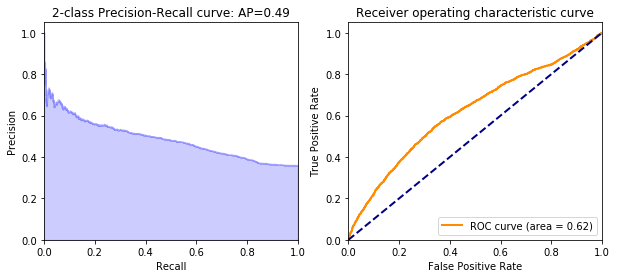

In [22]:
#more statistics to compute for graphing
y_score_5 = cv_5.decision_function(X_test)
precision_5, recall_5, _ = precision_recall_curve(y_test, y_score_5)
average_precision_5 = average_precision_score(y_test, y_score_5)
fpr_5, tpr_5, thresholds_5 = roc_curve(y_test, y_score_5, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall_5, precision_5, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_5, precision_5, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_5))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr_5, tpr_5, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr_5, tpr_5))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Intepretation